## Mounting the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Provide the path to folder in Drive
Make a separate folder in drive for your project, provide the path here so that the working directory is that specific folder which is created for this project

In [2]:
%cd /content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection

/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection


## Clone the Repository
Clone the Yolov5 official repository, go inside the folder yolov5 and install all the required libraries

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 27.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 55.5 MB/s 


## Training Model on Custom Dataset

Download the dataset for number plates detection from [here](https://drive.google.com/drive/folders/1BWqgpgYDd8ocTHsiwM0xUynku7_Wk162?usp=sharing)

Create a yaml file by the name of ```number_plates.yaml``` in the ```data``` directory which is inside the ```yolov5``` folder.

Paste the following data in it. Provide the path as per your case for the ```train``` and ```val```. 

``` yaml
train: "path to your training folder"
val: "path to your validation folder"

# number of classes -> here it is 1 (number plates)
nc: 1

# class names
names: [ 'number_plate']

```

In [6]:
# You can change the epochs for better results
!python train.py --img 640 --batch 16 --epochs 5 --data number_plates.yaml --weights yolov5x.pt

train: weights=yolov5x.pt, cfg=, data=number_plates.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree

## Inference of Object Detection on test dataset
Here we test the model for object detection on the provided test data. Automatic number plates recognition is a two step process. First the number plates is detected, then cropped and after that, the cropped portion is passed through the OCR which extract the data out of it. We can then save the data in our database. 

In [4]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source vehicles-number-plates-detection-1/test/images/

detect: weights=['runs/train/exp2/weights/best.pt'], source=vehicles-number-plates-detection-1/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-48-g5f8054c Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
image 1/29 /content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/vehicles-number-plates-detection-1/test/images/Cars104_png.rf.55f8e22cd11d5aafd722fcc7de43c653.jpg: 416x416 1 number_plate, 1640.9ms
image 2/29 /content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/ve

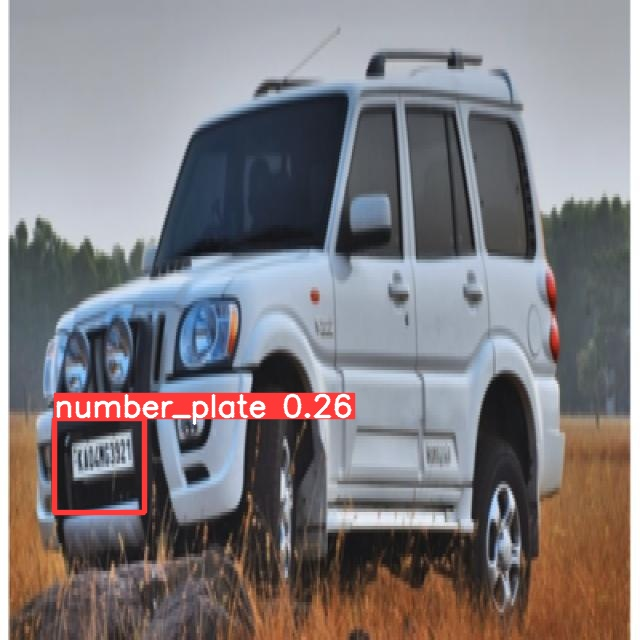

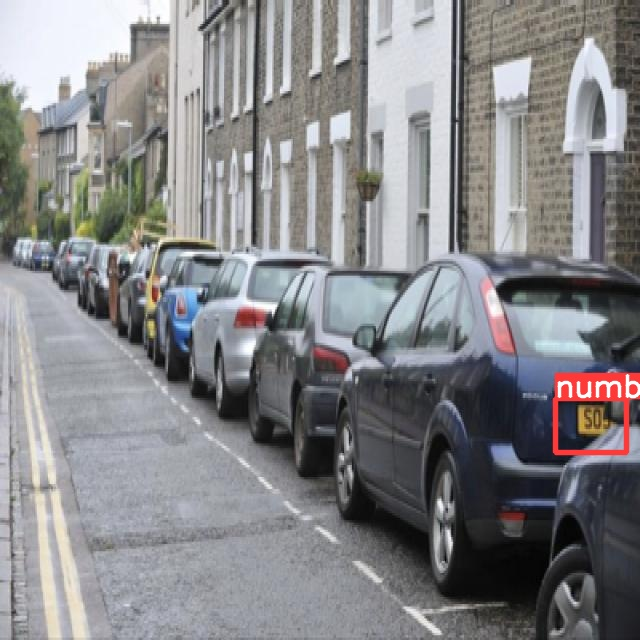

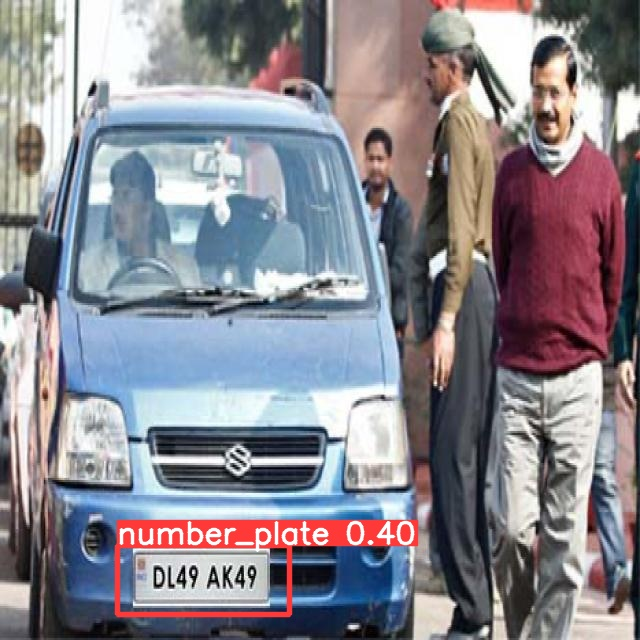

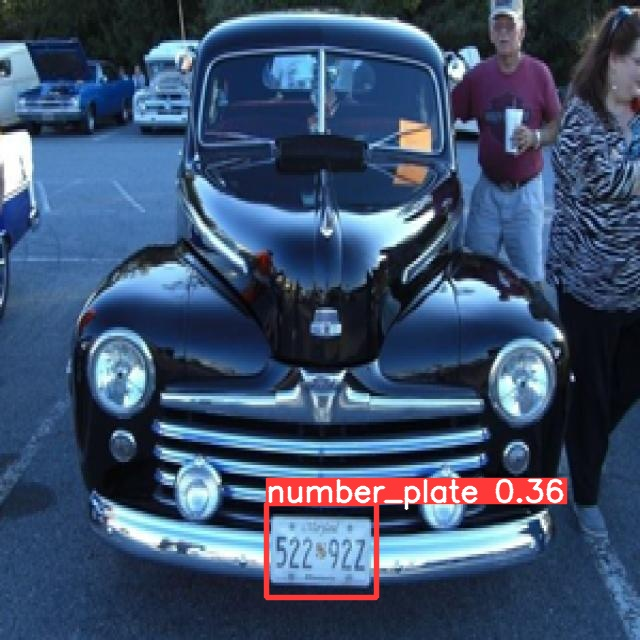

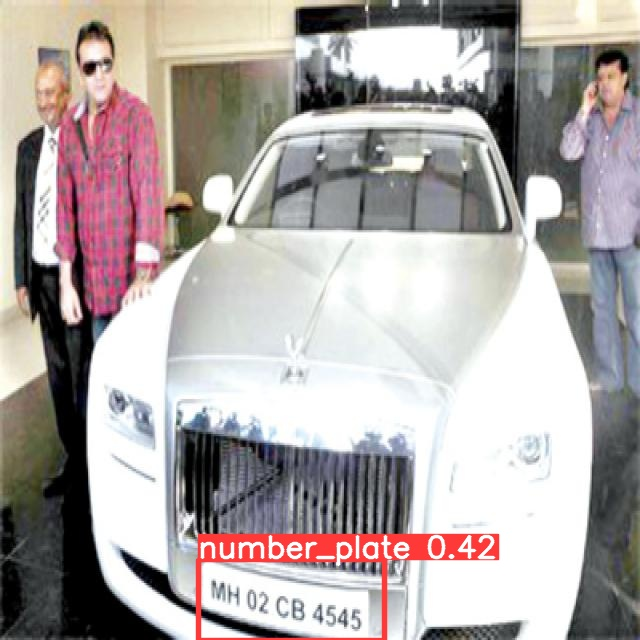

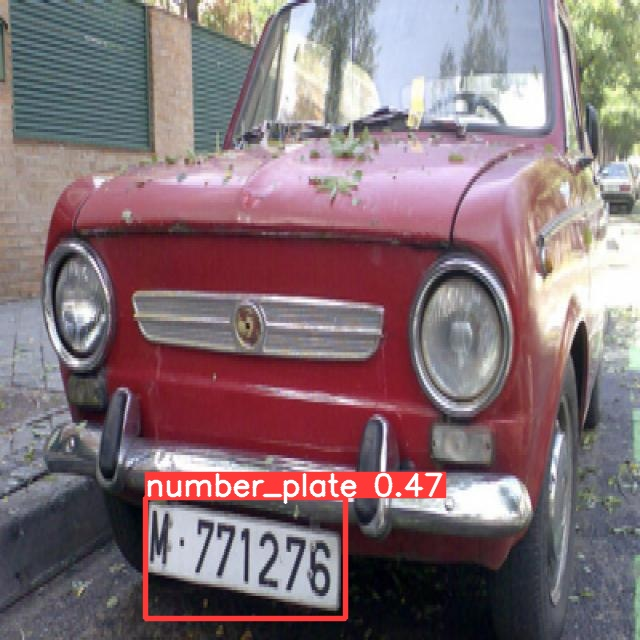

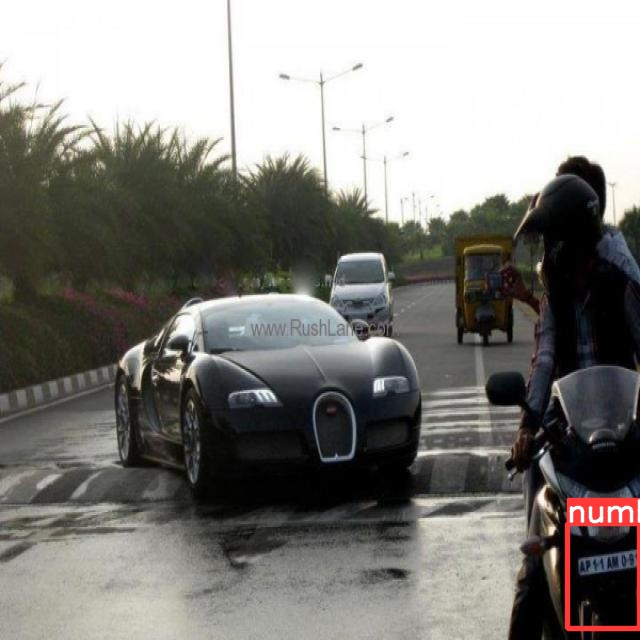

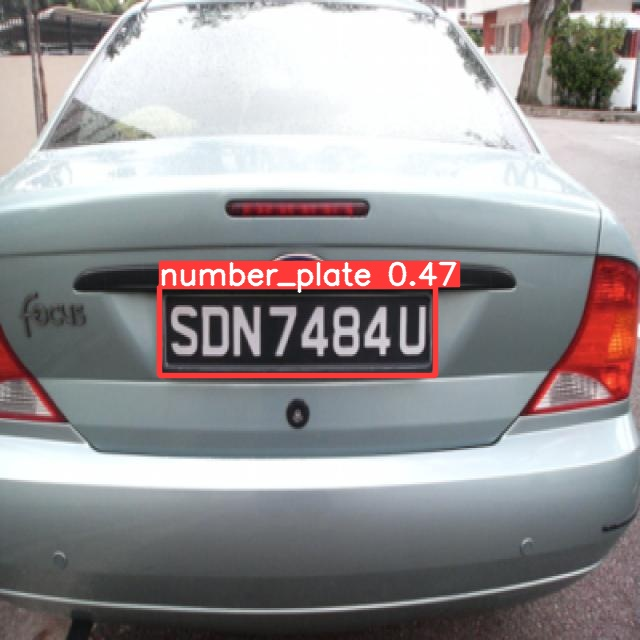

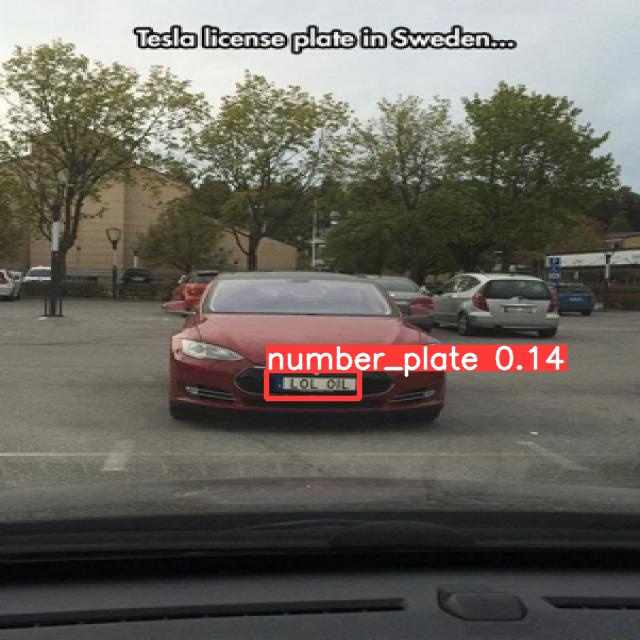

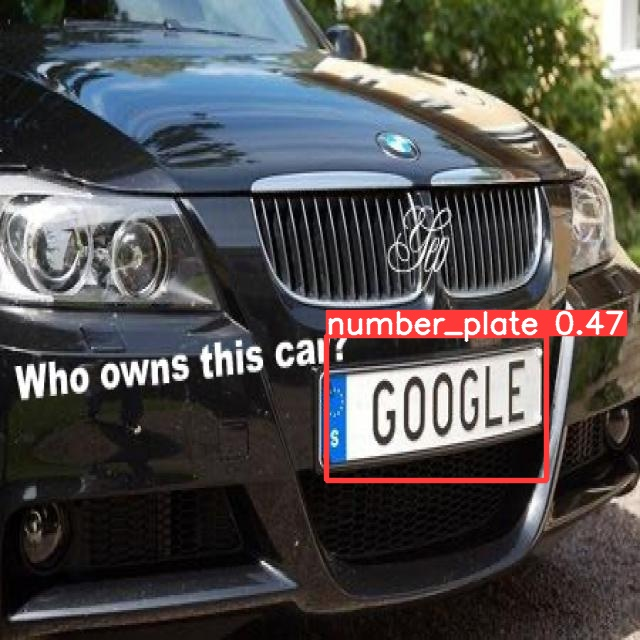

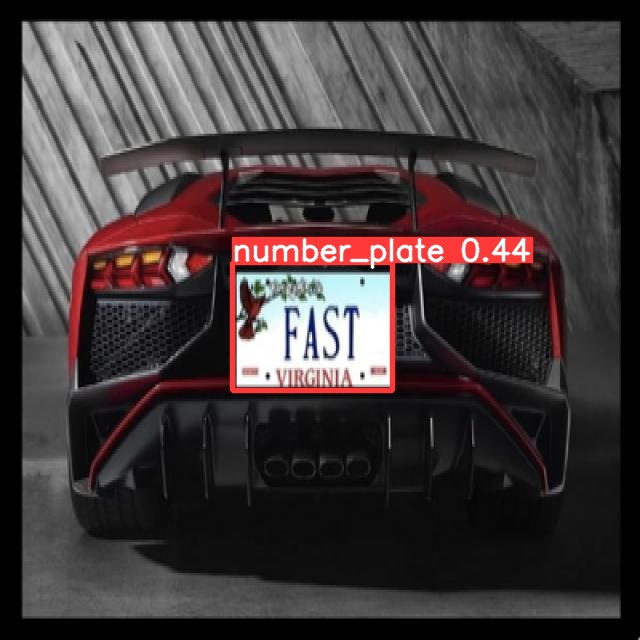

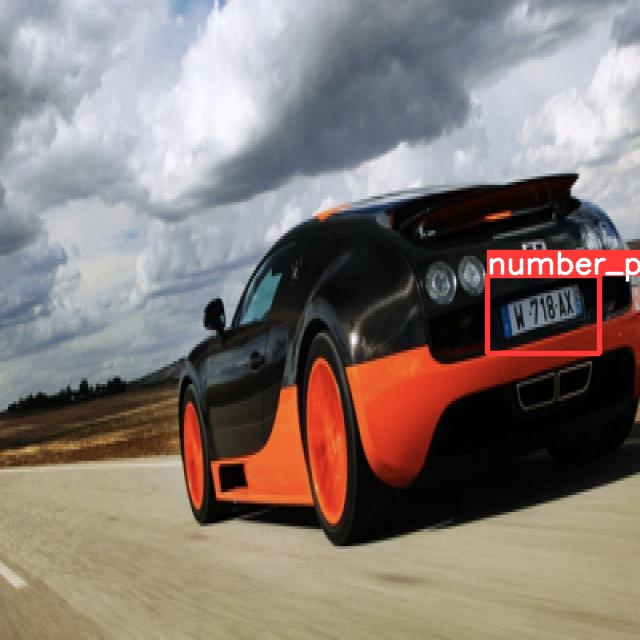

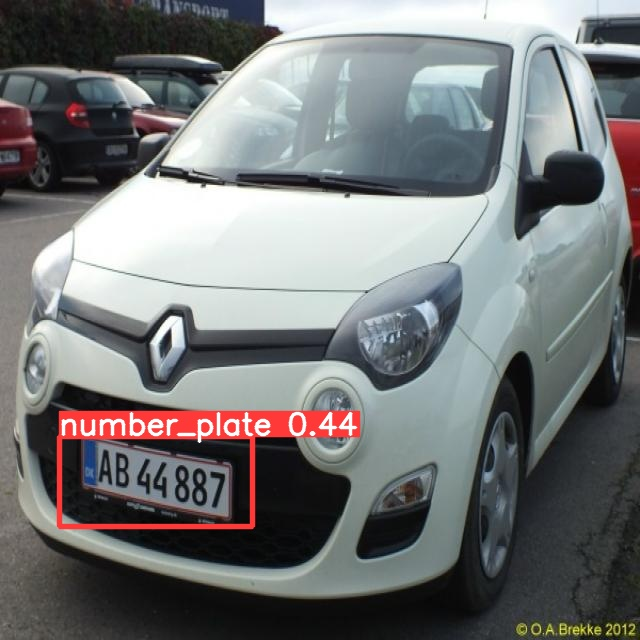

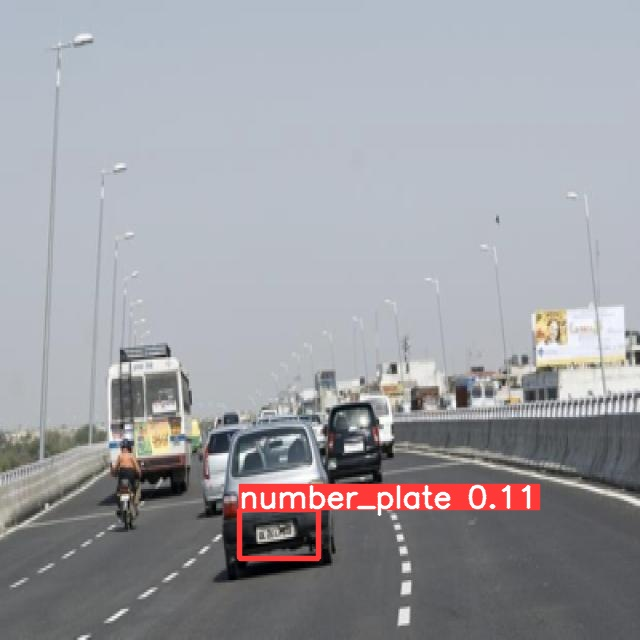

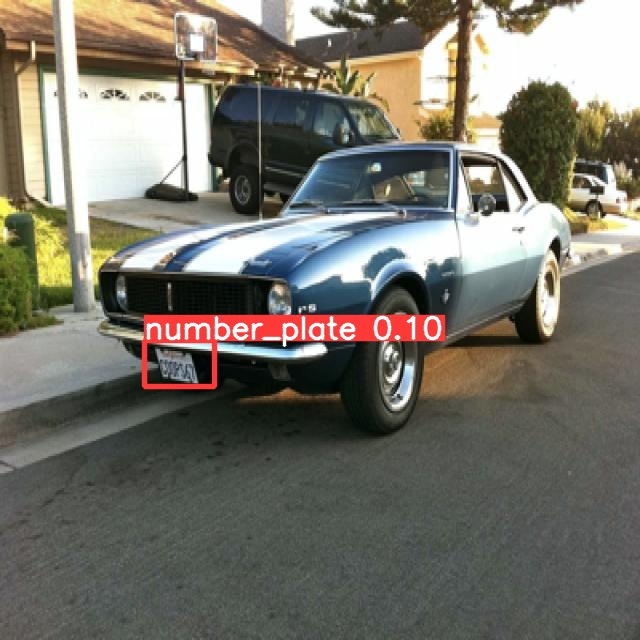

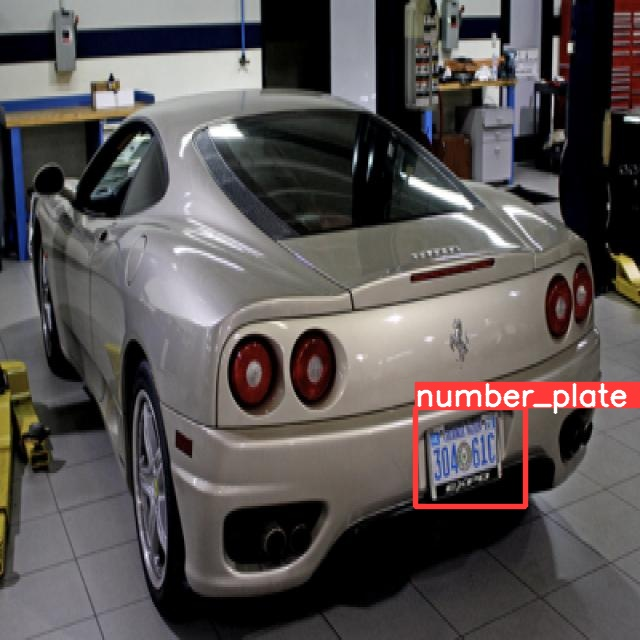

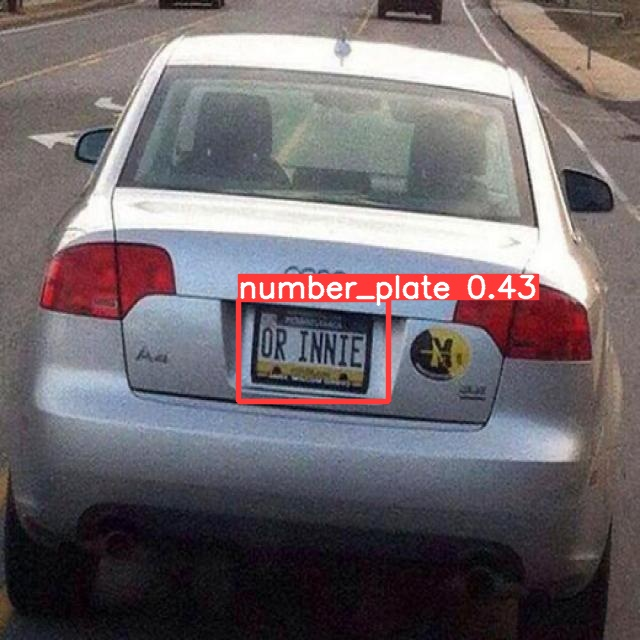

In [11]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [12]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 26.6 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 
     |████████████████████████████████| 145 kB 60.2 MB/s 
     |████████████████████████████████| 619 kB 60.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


## Number Plates Detection Using Yolov5 and Easy OCR

In [13]:
import easyocr
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Be careful with the path here
# Set the path for the saved model as per your case
# In my case it is -> 'runs/train/exp2/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'runs/train/exp2/weights/best.pt', force_reload=True)

# OCR for English Language
reader = easyocr.Reader(['en'])

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-25 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [45]:
%matplotlib inline


def inference_ocr(test_photo_path):
  results = model(test_photo_path)
  detections=np.squeeze(results.render())

  labels, coordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
  image = cv2.imread(test_photo_path)
  width, height = image.shape[1], image.shape[0]

  print(f'Photo width,height: {width},{height}. Detected plates: {len(labels)}')

  for i in range(len(labels)):
      row = coordinates[i]
      if row[4] >= 0.3:
          x1, y1, x2, y2 = int(row[0]*width), int(row[1]*height), int(row[2]*width), int(row[3]*height)
          plate_crop = image[int(y1):int(y2), int(x1):int(x2)]
          ocr_result = reader.readtext((plate_crop), paragraph="True", min_size=120, allowlist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
          text=ocr_result[0][1]
          cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6) ## BBox
          cv2.putText(image, f"{text}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, (30,50,255), 3)
          plt.axis(False)
          plt.imshow((image)[...,::-1])
          plt.show()
          
          print(f'Detection: {i+1}. YOLOv5 prob: {row[4]:.2f}, easyOCR results: {ocr_result}')

Photo width,height: 640,640. Detected plates: 1


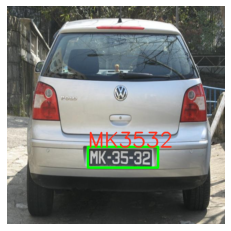

Detection: 1. YOLOv5 prob: 0.46, easyOCR results: [[[[0, 1], [191, 1], [191, 61], [0, 61]], 'MK3532']]


In [46]:
test_photo_path1 = "/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/vehicles-number-plates-detection-1/valid/images/Cars116_png.rf.f176ffd6ca483fdf615ae58229c6c9b0.jpg"
inference_ocr(test_photo_path1)

Photo width,height: 640,640. Detected plates: 1


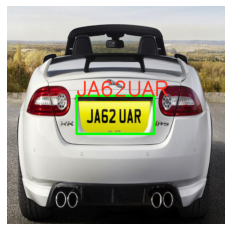

Detection: 1. YOLOv5 prob: 0.46, easyOCR results: [[[[24, 31], [198, 31], [198, 88], [24, 88]], 'JA62UAR']]


In [47]:
test_path_2 = "/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/vehicles-number-plates-detection-1/valid/images/Cars118_png.rf.84afde3ae52c923196b1a9ac14878644.jpg"
inference_ocr(test_path_2)

Photo width,height: 640,640. Detected plates: 1


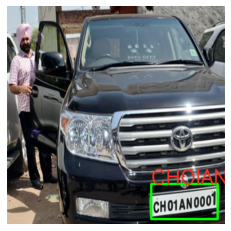

Detection: 1. YOLOv5 prob: 0.44, easyOCR results: [[[[-6, 14], [202, 14], [202, 97], [-6, 97]], 'CHOIANOOOI']]


In [48]:
test_3 = "/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/vehicles-number-plates-detection-1/valid/images/Cars140_png.rf.91dcb9964c246a95c48c0d1a8f1bdb90.jpg"
inference_ocr(test_3)

Photo width,height: 640,640. Detected plates: 1


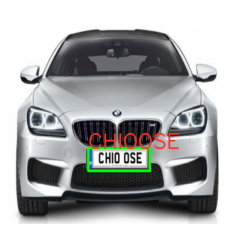

Detection: 1. YOLOv5 prob: 0.53, easyOCR results: [[[[22, 4], [164, 4], [164, 52], [22, 52]], 'CHIOOSE']]


In [49]:
test_path_4 = "/content/drive/MyDrive/ML_projects_work/robotics_project_cars_number_plate_detection/yolov5/vehicles-number-plates-detection-1/valid/images/Cars53_png.rf.336b2a37923ece7ba7f6576d7ddbad9b.jpg"
inference_ocr(test_path_4)